In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-csv/placement.csv


# Let's learn about Linear Regression 
*it is part of regression in supervised learning*

Linear Regression try to draw best fit line (linear/sort of linear) line with respect to Data. [BTS: It actually find m and b value of line equation for which we get least error] .

Where m --> slope ,
      b --> y-intercept

We can break LR in 4 parts :
1. Simple Linear Regression
2. Multiple Linear regression
3. Polynomial Linear regression
4. Regularization

let's have look on every parts step by step 

# Simple Linear Regression:
Predicting one variable using only one feature.

>You draw the best possible straight line that fits all data points.

Equation:

                *y=mx+b*

Where,

* m = slope

* b = intercept

🌍 Real-world example

Predict salary using years of experience.

let's see example below:

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/placement-csv/placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


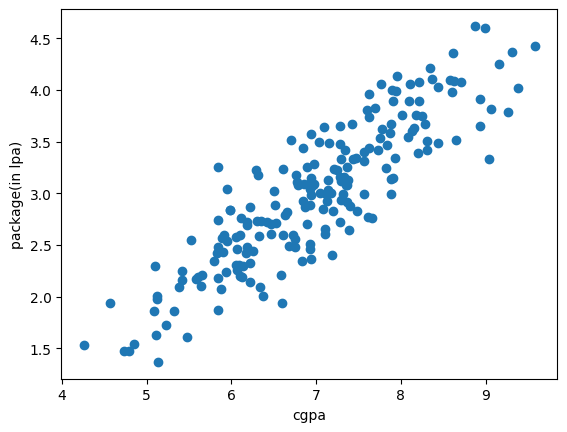

In [5]:
plt.scatter(x= 'cgpa',y= 'package',data=df)
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns =['package']),
                                                df['package'],test_size=0.2,
                                                random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [9]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [10]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

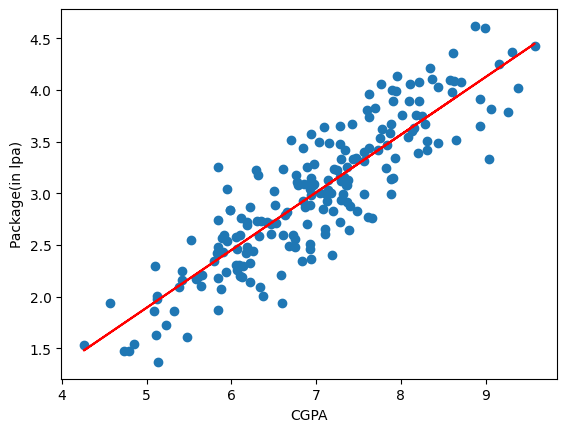

In [12]:
# This is best fit line
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [13]:
m=lr.coef_
b=lr.intercept_

In [14]:
# now check 
# y=mx+b
m*8.58 + b
# in this case it consider y= package and x= cgpa

array([3.89111601])

# Multiple Linear Regression:
Predicting one variable using multiple features.

> The line becomes a plane or hyperplane.

Equation:

      *y=b+w1​x1​+w2​x2​+⋯+wn​xn​*

🌍 Real-world example

* Predict house price using:

    area
    
    rooms
    
    age
    
    location score

let's have look on example code

In [15]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
# let's make our own dataset
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50) 

In [17]:
df = pd.DataFrame({'feature1':X[:,0],
                   'feature2':X[:,1],
                   'target':y})

In [18]:
df.head()

,feature1,feature2,target
0,0.044464,2.299113,76.794396
1,2.631476,0.673387,128.916494
2,-0.971419,0.800604,-86.845410
3,0.107570,0.655303,81.541631
4,-0.109624,0.835690,-112.753301


In [19]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [21]:

from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
     

lr.fit(X_train,y_train)
     


y_pred = lr.predict(X_test)
     

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 48.94975553577409
MSE 3318.8519684706166
R2 score 0.426144041407012


In [23]:
x = np.linspace(-5, 5, 10)
Y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(Y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T


z_final = lr.predict(final).reshape(10,10)

z = z_final

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T


fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = Y, z =z_final ))

fig.show()

In [24]:
lr.coef_

array([73.42788958,  8.07649124])

In [25]:
lr.intercept_

-3.769802847517111

# Polynomial Linear Regression 
Used when the relationship between X and Y is curved, not straight.

>We create extra features:

 >                           x, x2, x3...

>This lets linear regression draw a curve.

🌍 Real-world example

* Salary vs experience → usually curved
  
* Growth curves → curved

* Physics problems → curved

In [26]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

In [27]:
X = 5*np.random.rand(200,1) - 2.5
y = 0.7* X ** 2 + 0.8*X + 3 + np.random.rand(200,1)

# y= 0.7x^2 +0.8x +3

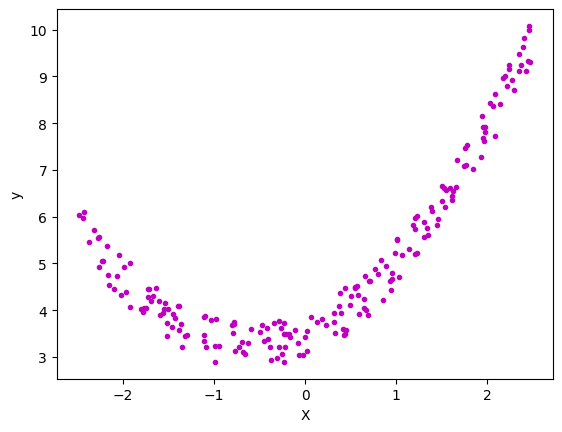

In [28]:
plt.plot(X,y,'m.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [30]:
lir = LinearRegression()

In [31]:
lir.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred= lir.predict(x_test)
r2_score(y_test,y_pred)

0.41991784889218964

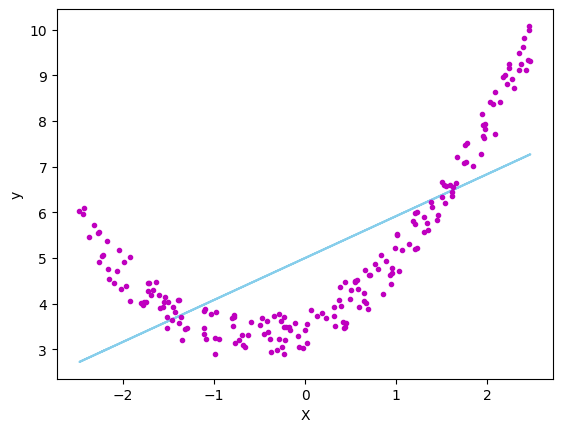

In [33]:
plt.plot(x_train,lir.predict(x_train),color = 'skyblue')
plt.plot(X,y,'m.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


**As you can see from graph and r2 score that normal linear regression fail to perform well.**

*So, let's solve this with polynomial linear regression*


In [34]:
# Apply polynomial linear regression
# degree = 2 , here degree is hyperparameter
pol= PolynomialFeatures(degree = 2)

x_train_tran = pol.fit_transform(x_train)
x_test_tran = pol.transform(x_test)

In [35]:
print(x_train[0])
print(x_train_tran[0])

[-2.2306282]
[ 1.         -2.2306282   4.97570215]


In [36]:
lr= LinearRegression()
lr.fit(x_train_tran,y_train)

LinearRegression()

In [37]:
y_pred= lr.predict(x_test_tran)
r2_score(y_test,y_pred)

0.971464927317288

In [38]:
lr.coef_ , lr.intercept_

(array([[0.        , 0.79953729, 0.70977878]]), array([3.51980135]))

In [39]:
x_new= np.linspace(-3,3,200).reshape(200,1)
x_new_pol = pol.transform(x_new)
y_new = lr.predict(x_new_pol)

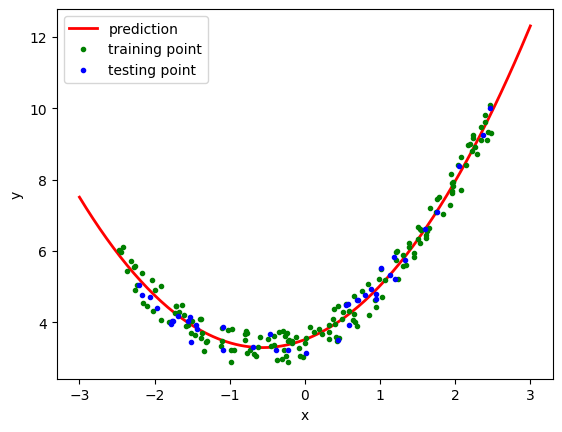

In [40]:
plt.plot(x_new,y_new,'r-',linewidth = 2,label = 'prediction')
plt.plot(x_train,y_train,'g.',label = 'training point')
plt.plot(x_test,y_test,'b.',label = 'testing point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**From r2 score and graph we can see that it work very well**.

As *Degree* is hyperparameter than :

* if it's value is too high than your model will become *Overfit*.
* if too low than *underfit*.

let's see  with visulization how underfitting and overfitting looks...

In [41]:
def polynomial_regression(degree):
    x_new= np.linspace(-3,3,100).reshape(100,1)
    x_new_pol = pol.transform(x_new)

    polybig_features= PolynomialFeatures(degree= degree,include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression=Pipeline([
        ('poly_feature',polybig_features),
        ('std_scaler',std_scaler),
        ('lin_reg',lin_reg)
    ])

    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r',label= 'Degree'+str(degree),linewidth = 2)

    plt.plot(x_train,y_train,'y.',linewidth = 3)
    plt.plot(x_test,y_test,'g.',linewidth = 3)
    plt.legend(loc='upper left' )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-3,3,0,10])
    plt.show()

*Overfitting*

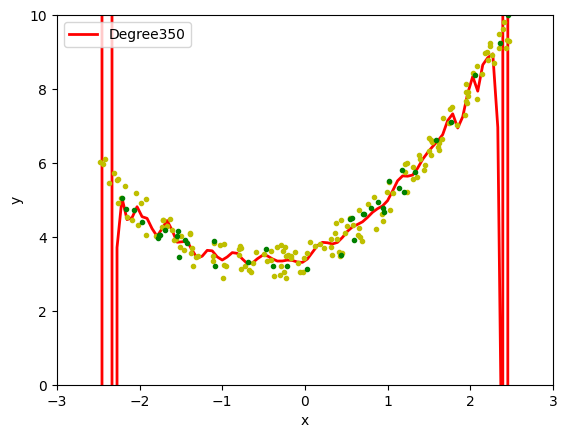

In [42]:
polynomial_regression(350)  

*Underfitting*

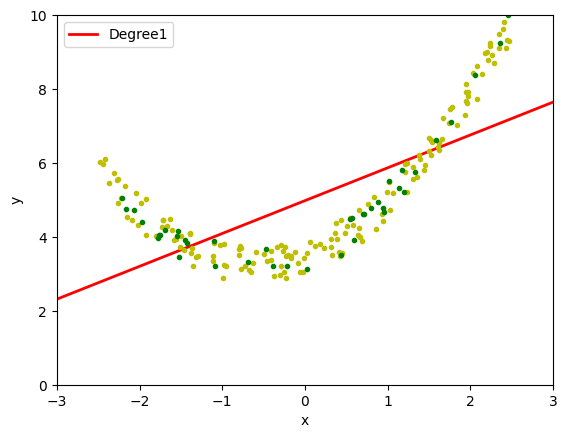

In [43]:
polynomial_regression(1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



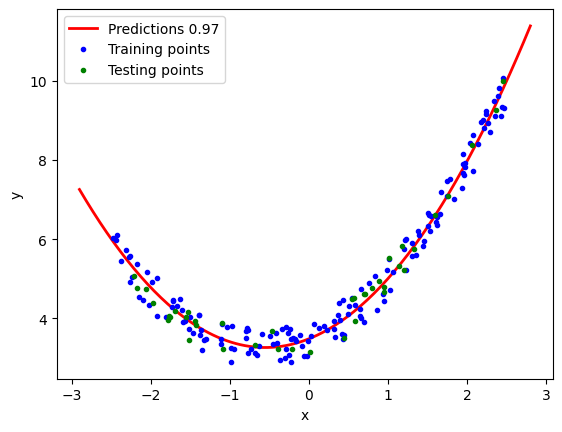

In [44]:
# Applying Gradient Descent

pol = PolynomialFeatures(degree=2)

x_train_trans = pol.fit_transform(x_train)
x_test_trans = pol.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(x_train_trans,y_train)

x_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
x_new_pol = pol.transform(x_new)
y_new = sgd.predict(x_new_pol)

y_pred = sgd.predict(x_test_trans)

plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [45]:
# 3D polynomial regression
x= 5* np.random.rand(100,1) - 3.5
y= 6* np.random.rand(100,1) - 3.5

z= x**2 + y**2 + 0.5*x + 0.5*y +0.1*x*y +2 + np.random.rand(100,1)


In [46]:
import plotly.express as px
df = px.data.iris()
fig= px.scatter_3d(df,x= x.ravel(),y=y.ravel(),z= z.ravel())
fig.show()

When we apply linear regression without polynomial feature

In [47]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(), 10)
y_input = np.linspace(y.min(),y.max(), 10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [48]:
import plotly.graph_objects as go

fig = px.scatter_3d(df,x= x.ravel(),y=y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final ))

fig.show()

When we apply linear regression with polynomial feature

In [49]:
x_multi = np.array([x,y]).reshape(100,2)
pol = PolynomialFeatures(degree = 6)
x_multi_trans= pol.fit_transform(x_multi)
print('input',pol.n_features_in_)
print('output',pol.n_output_features_)
print('power\n',pol.powers_)

input 2
output 28
power
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [50]:
lr.fit(x_multi_trans,z)

LinearRegression()

In [51]:
x_test_multi = pol.transform(final)

In [52]:
z_final = lr.predict(x_multi_trans).reshape(10,10)

fig = px.scatter_3d(df,x= x.ravel(),y=y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final ))

fig.update_layout(scene = dict(zaxis = dict(range = [0,35])))

fig.show()

# for regularization plz click [here](https://www.kaggle.com/code/sharmagayatri/regularization)